In [2]:
#Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Tras os dados e visualiza
df = pd.read_csv('./Dataset/PokemonData.csv')
df.head(5)

,Num,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
#Tipo de cada variavel
df.dtypes

Num            int64
Name          object
Type1         object
Type2         object
HP             int64
Attack         int64
Defense        int64
SpAtk          int64
SpDef          int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

### Tratando os dados

In [5]:
#Quantidade de pokemon por geração
df.groupby("Generation")["Num"].count()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: Num, dtype: int64

In [6]:
#Separar os dados em tabelas por geração
df_1gen = df[(df['Generation'] == 1)].copy()
df_2gen = df[(df['Generation'] == 2)].copy()
df_3gen = df[(df['Generation'] == 3)].copy()
df_4gen = df[(df['Generation'] == 4)].copy()
df_5gen = df[(df['Generation'] == 5)].copy()
df_6gen = df[(df['Generation'] == 6)].copy()

#Numero de gerações
gens = 6

#Coloca todos em um array
arr_gen = [df_1gen, df_2gen, df_3gen, df_4gen, df_5gen, df_6gen]

In [7]:
#Ferramentos
def remover_mega(dataFrame):
    #Remover os megas
    indexes = dataFrame[dataFrame['Name'].str.contains("Mega ")].index #pega os indexes dos megas, deixar espaço depois do mega por causa do Meganiun
    dataFrame.drop(indexes, inplace=True)

#### Remover os Megas
Para essa análise, os megas não serão utilizados, assim para ficar mais fácil a análise os mesmos serão removidos.

In [8]:
#Removendo os megas
for gen in range(gens):
    remover_mega(arr_gen[gen])

#### Iniciais
Agora vamos pegar os iniciais de cada geração, e suas respectivas evoluções

In [9]:
def pega_inicias(dataFrame):
    # Como as 9 primeiras entradas representam os Pokemon inicias.
    new_df = dataFrame.head(9)
    return new_df

def reset_num(dataFrame):
    # Como estavam eu um unico Data Frame, os valores de Num precisam ser corrigidos, para facilitar o uso futuro
    cont = 0
    for row in range(dataFrame.shape[0]):
        dataFrame.iat[row, 0] = cont+1
        cont += 1

In [10]:
df_ini1gen = pega_inicias(arr_gen[0])
df_ini2gen = pega_inicias(arr_gen[1])
df_ini3gen = pega_inicias(arr_gen[2])
df_ini4gen = pega_inicias(arr_gen[3])
df_ini5gen = pega_inicias(arr_gen[4])
df_ini6gen = pega_inicias(arr_gen[5])

#array com os inicias
arr_iniGen = [df_ini1gen, df_ini2gen, df_ini3gen, df_ini4gen, df_ini5gen, df_ini6gen]

#Corrige os valores de NUM
for gen in range(gens):
    reset_num(arr_iniGen[gen])

#Para confirmar, vamos printar a quantidade de linhas de cada DF
for gen in range(gens):
    print("{} -> {}".format(gen+1, arr_iniGen[gen].shape[0]))

1 -> 9
2 -> 9
3 -> 9
4 -> 9
5 -> 9
6 -> 9


## Analisando
Agora que já tratamos e separamos os dados que queríamos, vamos analisá-los.

#### Achando a média por tipo
Vamos achar a média por tipo e estágio de cada pokemon.

In [16]:
def soma_atributo_stage(atri, num, tipo):
    soma = 0
    #Corrige o Num de acordo com o tipo
    if tipo == 'Water': num += 6
    if tipo == 'Fire': num += 3
        
    for gen in range(gens):
        df_poke = arr_iniGen[gen][(arr_iniGen[gen]['Num'] == num) & (arr_iniGen[gen]['Type1'] == tipo)]
        soma += df_poke[atri].sum()
    return soma

def novo_dataFrame(tipo):
    new_df = pd.DataFrame({'Stage':['Base', 'Stagio1', 'Stagio2'], 
                            'HP':[soma_atributo_stage('HP', 1, tipo)/gens, soma_atributo_stage('HP', 2, tipo)/gens, soma_atributo_stage('HP', 3, tipo)/gens],
                            'Attack':[soma_atributo_stage('Attack', 1, tipo)/gens, soma_atributo_stage('Attack', 2, tipo)/gens, soma_atributo_stage('Attack', 3, tipo)/gens],
                            'Defense':[soma_atributo_stage('Defense', 1, tipo)/gens, soma_atributo_stage('Defense', 2, tipo)/gens, soma_atributo_stage('Defense', 3, tipo)/gens],
                            'SpAtk':[soma_atributo_stage('SpAtk', 1, tipo)/gens, soma_atributo_stage('SpAtk', 2, tipo)/gens, soma_atributo_stage('SpAtk', 3, tipo)/gens],
                            'SpDef':[soma_atributo_stage('SpDef', 1, tipo)/gens, soma_atributo_stage('SpDef', 2, tipo)/gens, soma_atributo_stage('SpDef', 3, tipo)/gens],
                            'Speed':[soma_atributo_stage('Speed', 1, tipo)/gens, soma_atributo_stage('Speed', 2, tipo)/gens, soma_atributo_stage('Speed', 3, tipo)/gens],
                          })
    return new_df

In [17]:
#Medias
df_iniGrama = novo_dataFrame('Grass')
df_iniAgua = novo_dataFrame('Water')
df_iniFogo = novo_dataFrame('Fire')

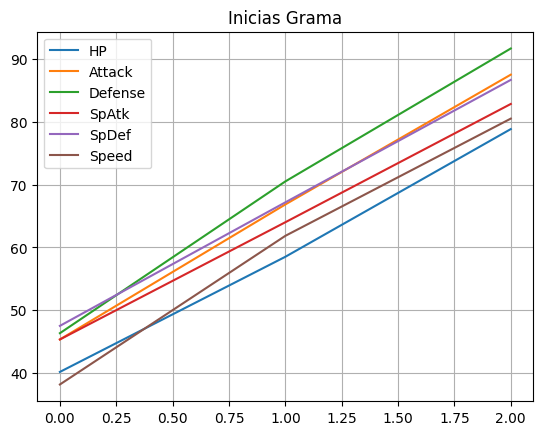

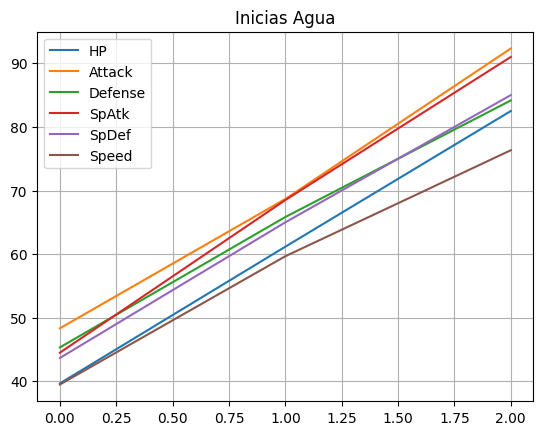

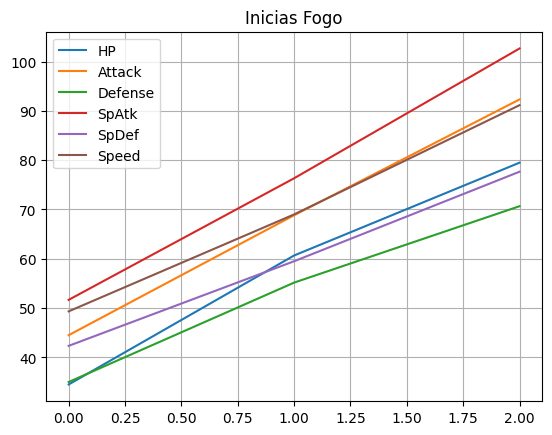

In [18]:
#Representando em gráfico
plotGrama = df_iniGrama.plot(grid=True, title="Inicias Grama")
plotAgua = df_iniAgua.plot(grid=True, title="Inicias Agua")
plotFogo = df_iniFogo.plot(grid=True, title="Inicias Fogo")

#### Conclusão
Por fim, podemos concluir que os inicias do tipo Fogo possuem sua força no atributo Sp.Atk, já que possuem a maior média e crescimento no mesmo, os do tipo Grama por usa vez possuem a Defense como ponto forte, já os de Agua são mais equilibrados possuindo um Attack e Sp.Atk que se mantém próximo.

## Indo mais fundo
### Relação
Vamos analisar se a relação de FogoXSp.Atk e GramaXDefense é forte ou fraca.

### GramaXDefense
Priemiro vamos plotar o gráfico de dispersão.